In [3]:

import pandas as pd
df=pd.read_csv(r"C:\Users\palak\Downloads\Original_data.csv")
print(df.head())

       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time    

In [4]:
df.shape

(255347, 18)

In [5]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [6]:
df.EmploymentType.unique()

array(['Full-time', 'Unemployed', 'Self-employed', 'Part-time'],
      dtype=object)

In [7]:
!python --version

!pip install imbalanced-learn


Python 3.13.3


In [8]:
df['Default'].value_counts(normalize=True)

Default
0    0.883872
1    0.116128
Name: proportion, dtype: float64

In [9]:
X= df.drop(columns=['Default'])
Y= df['Default']


In [13]:
"""# **Balancing Data**"""

# Step 2: Apply SMOTE to balance the classes
from imblearn.over_sampling import SMOTE

# Use only numeric features (from your earlier list)
selected_features = [
    'Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
     'InterestRate', 'LoanTerm', 'DTIRatio'
]

X = df[selected_features]
y = df['Default']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f"✅ After SMOTE: {X_resampled.shape}, Class balance: {y_resampled.value_counts().to_dict()}")



✅ After SMOTE: (451388, 8), Class balance: {0: 225694, 1: 225694}


In [14]:
# Step 3: Combine resampled features and target variable into a new DataFrame
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df["Default"] = y_resampled

resampled_df.to_csv('Processed_data.csv', index=False)

resampled_df.head()

resampled_df['Default'].value_counts(normalize=True)

Default
0    0.5
1    0.5
Name: proportion, dtype: float64

In [15]:
"""# **Feature Reduction**"""

X = resampled_df[['Age', 'Income', 'LoanAmount', 'CreditScore','MonthsEmployed','InterestRate','DTIRatio','LoanTerm']]
Y= resampled_df['Default']

X.shape,Y.shape

((451388, 8), (451388,))

In [16]:
# Step 3: Combine resampled features and target variable into a new DataFrame
final_df = pd.DataFrame(X, columns=X.columns)
final_df["Default"] = Y

final_df.head()

final_df.shape

final_df.to_csv('Selected_features.csv', index=False)


In [17]:
df.shape

(255347, 18)

In [18]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [19]:
"""# TrainTest Split"""

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7,stratify = Y)

X_train.head()

X_train.isnull().sum()


Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
InterestRate      0
DTIRatio          0
LoanTerm          0
dtype: int64

In [20]:
"""# **Getting Feature importance**

# APPLY DECISION TREE
"""

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 7)
dt.fit(X_train,y_train)

# importance of all features
sorted(zip(dt.feature_importances_,X_train.columns),reverse = True)

# 2) mean importance take col > mean import
mean_imp = sum(dt.feature_importances_)/len(dt.feature_importances_)
X_train.columns[dt.feature_importances_ > mean_imp ]

# 3) Select top 5
sorted(zip(dt.feature_importances_,X_train.columns),reverse = True)[:5]

[(np.float64(0.34417827405943013), 'LoanTerm'),
 (np.float64(0.13383252916726077), 'Age'),
 (np.float64(0.12421017444519757), 'InterestRate'),
 (np.float64(0.09982788854927357), 'Income'),
 (np.float64(0.0943410347682023), 'LoanAmount')]

In [21]:
"""# APPLY RFE"""

from sklearn.feature_selection import RFE

rfe = RFE(dt)
rfe.fit(X_train,y_train)

for imp,col in sorted(zip(rfe.ranking_,X_train.columns)):
    print(f"{col} = {imp}")

#2) important column rank = 1

print("Column Count = ",len(X_train.columns[rfe.ranking_ == 1  ]))
X_train.columns[rfe.ranking_ == 1 ]

Income = 1
InterestRate = 1
LoanAmount = 1
LoanTerm = 1
Age = 2
CreditScore = 3
MonthsEmployed = 4
DTIRatio = 5
Column Count =  4


Index(['Income', 'LoanAmount', 'InterestRate', 'LoanTerm'], dtype='object')

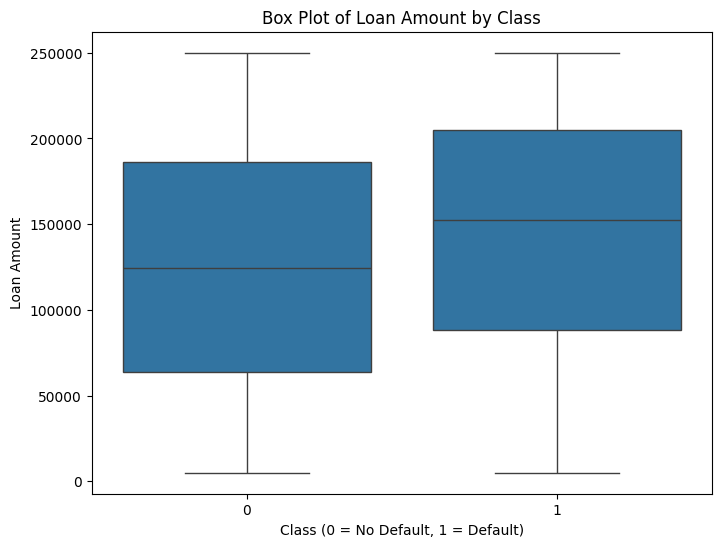

                     Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
Age             1.000000  0.015184   -0.019221     0.011782        0.033018   
Income          0.015184  1.000000   -0.069877     0.000375        0.009705   
LoanAmount     -0.019221 -0.069877    1.000000    -0.001781       -0.007089   
CreditScore     0.011782  0.000375   -0.001781     1.000000        0.010286   
MonthsEmployed  0.033018  0.009705   -0.007089     0.010286        1.000000   
InterestRate   -0.047432 -0.014351    0.009952    -0.008029       -0.022212   
LoanTerm        0.000639 -0.000211   -0.000392     0.001362       -0.001372   
DTIRatio       -0.011840 -0.000454    0.002259     0.001314       -0.003029   
Default        -0.295708 -0.150234    0.135298    -0.060132       -0.169656   

                InterestRate  LoanTerm  DTIRatio   Default  
Age                -0.047432  0.000639 -0.011840 -0.295708  
Income             -0.014351 -0.000211 -0.000454 -0.150234  
LoanAmount          0.0099

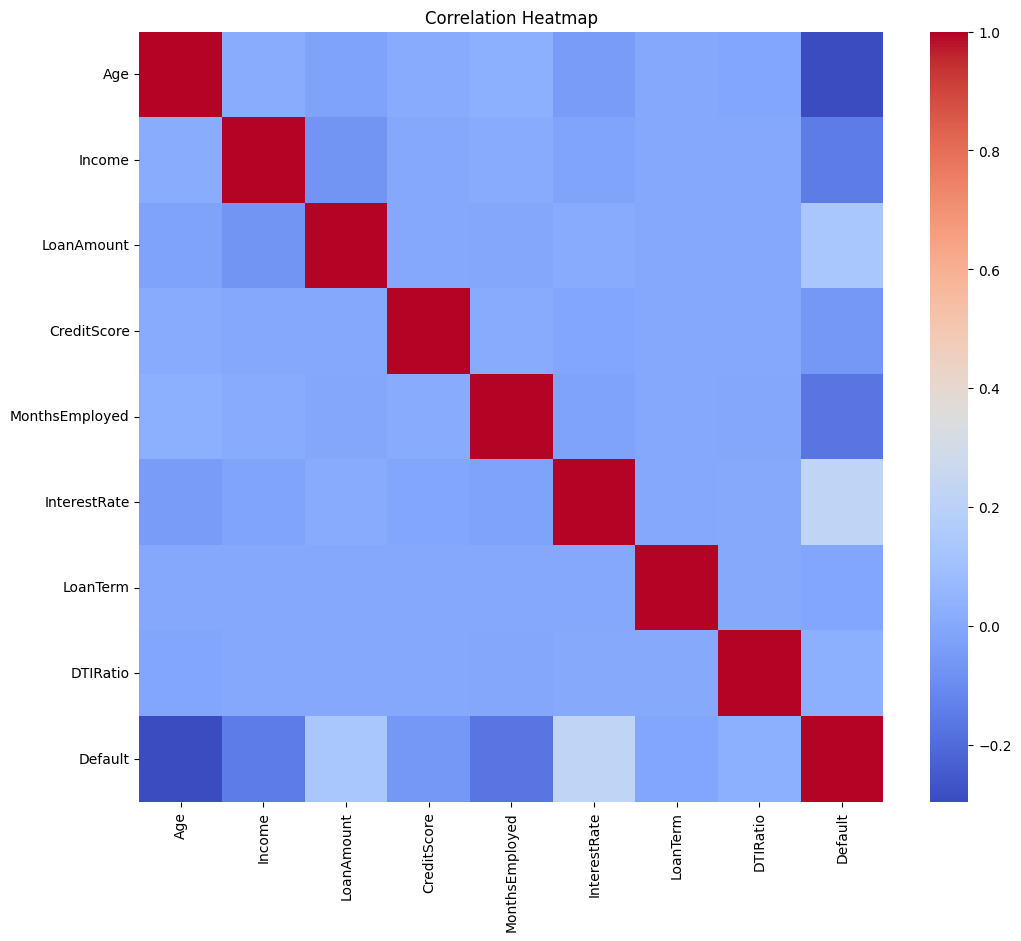

((315971, 8), (135417, 8), (315971,), (135417,))

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# The error was caused because the original `df` still contained
# non-numeric columns. Using the one-hot encoded dataframe `X_encoded`
# which contains only numeric data.
X_for_corr = resampled_df.copy()
# X_for_corr['Default'] = y_resampled # This line is not needed as resampled_df already has the 'Default' column


plt.figure(figsize=(8, 6))
sns.boxplot(x=X_for_corr["Default"], y=X_for_corr["LoanAmount"])
plt.title("Box Plot of Loan Amount by Class")
plt.xlabel("Class (0 = No Default, 1 = Default)")
plt.ylabel("Loan Amount")
plt.show()

"""# Correlation"""

# Compute correlation matrix
correlation_matrix = X_for_corr.corr()

# Print correlation matrix
print(correlation_matrix)

"""# HeatMap"""

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")

# Show the plot
plt.title("Correlation Heatmap")
plt.show()

X = X_resampled
Y= y_resampled

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score

# Use balanced class weights to improve recall on minority class
logreg = LogisticRegression(class_weight='balanced', random_state=7, max_iter=1000)

# Fit the model
logreg.fit(X_train, Y_train)

# Predict
y_pred = logreg.predict(X_test)

# Evaluate
accuracy = accuracy_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)


print(f"✅ Accuracy: {accuracy:.4f}")
print(f"🔁 Recall: {recall:.4f}")
print("\n📊 Confusion Matrix:")
print(conf_matrix)




✅ Accuracy: 0.8185
🔁 Recall: 0.8192

📊 Confusion Matrix:
[[55495 12367]
 [12217 55338]]

📋 Classification Report:


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score

rf = RandomForestClassifier(class_weight='balanced', random_state=7, n_jobs=-1)
rf.fit(X_train, Y_train)

y_pred_rf = rf.predict(X_test)

print("🌲 Random Forest")
print(f"✅ Accuracy: {accuracy_score(Y_test, y_pred_rf):.4f}")
print(f"🔁 Recall: {recall_score(Y_test, y_pred_rf):.4f}")
print(confusion_matrix(Y_test, y_pred_rf))
print(classification_report(Y_test, y_pred_rf))

🌲 Random Forest
✅ Accuracy: 0.8786
🔁 Recall: 0.8514
[[61466  6396]
 [10038 57517]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88     67862
           1       0.90      0.85      0.87     67555

    accuracy                           0.88    135417
   macro avg       0.88      0.88      0.88    135417
weighted avg       0.88      0.88      0.88    135417



In [31]:
!pip install xgboost

  Using cached xgboost-3.0.3-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.3-py3-none-win_amd64.whl (149.9 MB)


In [32]:
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=Y_train.value_counts()[0] / Y_train.value_counts()[1],
                    use_label_encoder=False, eval_metric='logloss', random_state=7)
xgb.fit(X_train, Y_train)

y_pred_xgb = xgb.predict(X_test)

print("\n⚡ XGBoost")
print(f"✅ Accuracy: {accuracy_score(Y_test, y_pred_xgb):.4f}")
print(f"🔁 Recall: {recall_score(Y_test, y_pred_xgb):.4f}")
print(confusion_matrix(Y_test, y_pred_xgb))
print(classification_report(Y_test, y_pred_xgb))


c:\Users\palak\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:45:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



⚡ XGBoost
✅ Accuracy: 0.8891
🔁 Recall: 0.8150
[[65338  2524]
 [12498 55057]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90     67862
           1       0.96      0.81      0.88     67555

    accuracy                           0.89    135417
   macro avg       0.90      0.89      0.89    135417
weighted avg       0.90      0.89      0.89    135417



In [33]:
%pip install catboost
from catboost import CatBoostClassifier

cat = CatBoostClassifier(auto_class_weights='Balanced', verbose=0, random_state=7)
cat.fit(X_train, Y_train)

y_pred_cat = cat.predict(X_test)

print("\n🐱 CatBoost")
print(f"✅ Accuracy: {accuracy_score(Y_test, y_pred_cat):.4f}")
print(f"🔁 Recall: {recall_score(Y_test, y_pred_cat):.4f}")
print(confusion_matrix(Y_test, y_pred_cat))
print(classification_report(Y_test, y_pred_cat))


   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 1.0/102.4 MB 11.3 MB/s eta 0:00:09
   -- ------------------------------------- 5.8/102.4 MB 19.1 MB/s eta 0:00:06
   ----- ---------------------------------- 12.8/102.4 MB 25.0 MB/s eta 0:00:04
   ------- -------------------------------- 19.1/102.4 MB 26.3 MB/s eta 0:00:04
   ---------- ----------------------------- 26.5/102.4 MB 28.4 MB/s eta 0:00:03
   ------------- -------------------------- 33.8/102.4 MB 29.6 MB/s eta 0:00:03
   --------------- ------------------------ 40.9/102.4 MB 30.4 MB/s eta 0:00:03
   ------------------ --------------------- 48.0/102.4 MB 31.0 MB/s eta 0:00:02
   --------------------- ------------------ 54.5/102.4 MB 31.0 MB/s eta 0:00:02
   ----------------------- ---------------- 60.8/102.4 MB 30.9 MB/s eta 0:00:02
   -------------------------- ------------- 67.6/102.4 MB 31.0 MB/s eta 0:00:02
   ---------------------------- ----------- 72.1/10

In [41]:
import joblib

# Save the best model
joblib.dump(cat, "best_catboost_model.pkl")
print("✅ CatBoost model saved as best_catboost_model.pkl")


✅ CatBoost model saved as best_catboost_model.pkl


In [42]:
from catboost import Pool

onnx_path = "catboost_model.onnx"

cat.save_model(
    fname=onnx_path,
    format="onnx",
    export_parameters={
        'onnx_domain': 'ai.catboost',
        'onnx_model_version': 1,
        'onnx_doc_string': 'CatBoost Loan Default Model'
    },
    pool=Pool(X_train, Y_train)
)

print(f"📦 CatBoost model exported to ONNX format at: {onnx_path}")

📦 CatBoost model exported to ONNX format at: catboost_model.onnx


In [36]:
!pip install streamlit

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.9 MB 5.0 MB/s eta 0:00:02
   -------- ------------------------------- 2.1/9.9 MB 4.9 MB/s eta 0:00:02
   ----------- ---------------------------- 2.9/9.9 MB 4.9 MB/s eta 0:00:02
   --------------- ------------------------ 3.9/9.9 MB 4.9 MB/s eta 0:00:02
   -------------------- ------------------- 5.0/9.9 MB 4.9 MB/s eta 0:00:02
   ------------------------ --------------- 6.0/9.9 MB 5.0 MB/s eta 0:00:01
   ---------------------------- ----------- 7.1/9.9 MB 5.0 MB/s eta 0:00:01
   -------------------------------- ------- 8.1/9.9 MB 5.0 MB/s eta 0:00:01
   ------------------------------------ --- 9.2/9.9 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 4.9 MB/s  0:00:02
   ---------------------------------------- 0.0/731.2 kB ? eta -:--:--
   ---------------------------------------- 731.2/731.2 kB 4.1 MB/s  0:00:00
   -----------------------

In [38]:
!pip install onnxruntime


   ---------------------------------------- 0.0/12.7 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.7 MB 5.3 MB/s eta 0:00:03
   ----- ---------------------------------- 1.8/12.7 MB 5.1 MB/s eta 0:00:03
   --------- ------------------------------ 3.1/12.7 MB 5.2 MB/s eta 0:00:02
   ------------- -------------------------- 4.2/12.7 MB 5.2 MB/s eta 0:00:02
   ---------------- ----------------------- 5.2/12.7 MB 5.2 MB/s eta 0:00:02
   ------------------- -------------------- 6.3/12.7 MB 5.2 MB/s eta 0:00:02
   ---------------------- ----------------- 7.1/12.7 MB 5.2 MB/s eta 0:00:02
   ----------------------- ---------------- 7.6/12.7 MB 4.8 MB/s eta 0:00:02
   ------------------------ --------------- 7.9/12.7 MB 4.3 MB/s eta 0:00:02
   ---------------------------- ----------- 8.9/12.7 MB 4.3 MB/s eta 0:00:01
   ------------------------------ --------- 9.7/12.7 MB 4.4 MB/s eta 0:00:01
   --------------------------------- ------ 10.7/12.7 MB 4.4 MB/s eta 0:00:01
   --

In [39]:
import streamlit as st
import numpy as np
import onnxruntime as ort
import pandas as pd

# Load ONNX model
session = ort.InferenceSession("catboost_model.onnx")

# Get model input name
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name

st.set_page_config(page_title="Loan Default Predictor", layout="centered")

st.title("🏦 Loan Default Predictor (CatBoost + ONNX)")
st.markdown("Enter applicant details to predict the risk of loan default.")

# Define feature inputs (same order and features used during training!)
def user_input():
    age = st.slider("Age", 21, 70, 30)
    income = st.number_input("Income", 20000, 200000, 50000)
    loan_amount = st.number_input("Loan Amount", 1000, 150000, 10000)
    credit_score = st.slider("Credit Score", 300, 850, 650)
    months_employed = st.slider("Months Employed", 0, 360, 24)
    num_credit_lines = st.slider("Number of Credit Lines", 1, 15, 5)
    interest_rate = st.slider("Interest Rate (%)", 3.0, 25.0, 10.0)
    dti_ratio = st.slider("DTI Ratio", 0.1, 1.0, 0.3)

    # Add more fields as required by your model

    data = np.array([[
        age, income, loan_amount, credit_score, months_employed,
        num_credit_lines, interest_rate, dti_ratio
        # 👆 Add other inputs in same order as training
    ]], dtype=np.float32)

    return data

input_data = user_input()

if st.button("🔍 Predict"):
    prediction = session.run([output_name], {input_name: input_data})[0]
    result = int(prediction[0])
    if result == 1:
        st.error("❌ High Risk: Likely to Default")
    else:
        st.success("✅ Low Risk: Unlikely to Default")


2025-08-03 15:50:29.235 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-03 15:50:29.236 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-03 15:50:29.302 
  command:

    streamlit run C:\Users\palak\AppData\Roaming\Python\Python313\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-08-03 15:50:29.303 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-03 15:50:29.304 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-03 15:50:29.305 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-03 15:50:29.305 Thread 'MainThread': missing ScriptRunContext! This warning can b

In [40]:
import os
print(os.getcwd())

c:\Users\palak\Downloads
